# One Layer Example

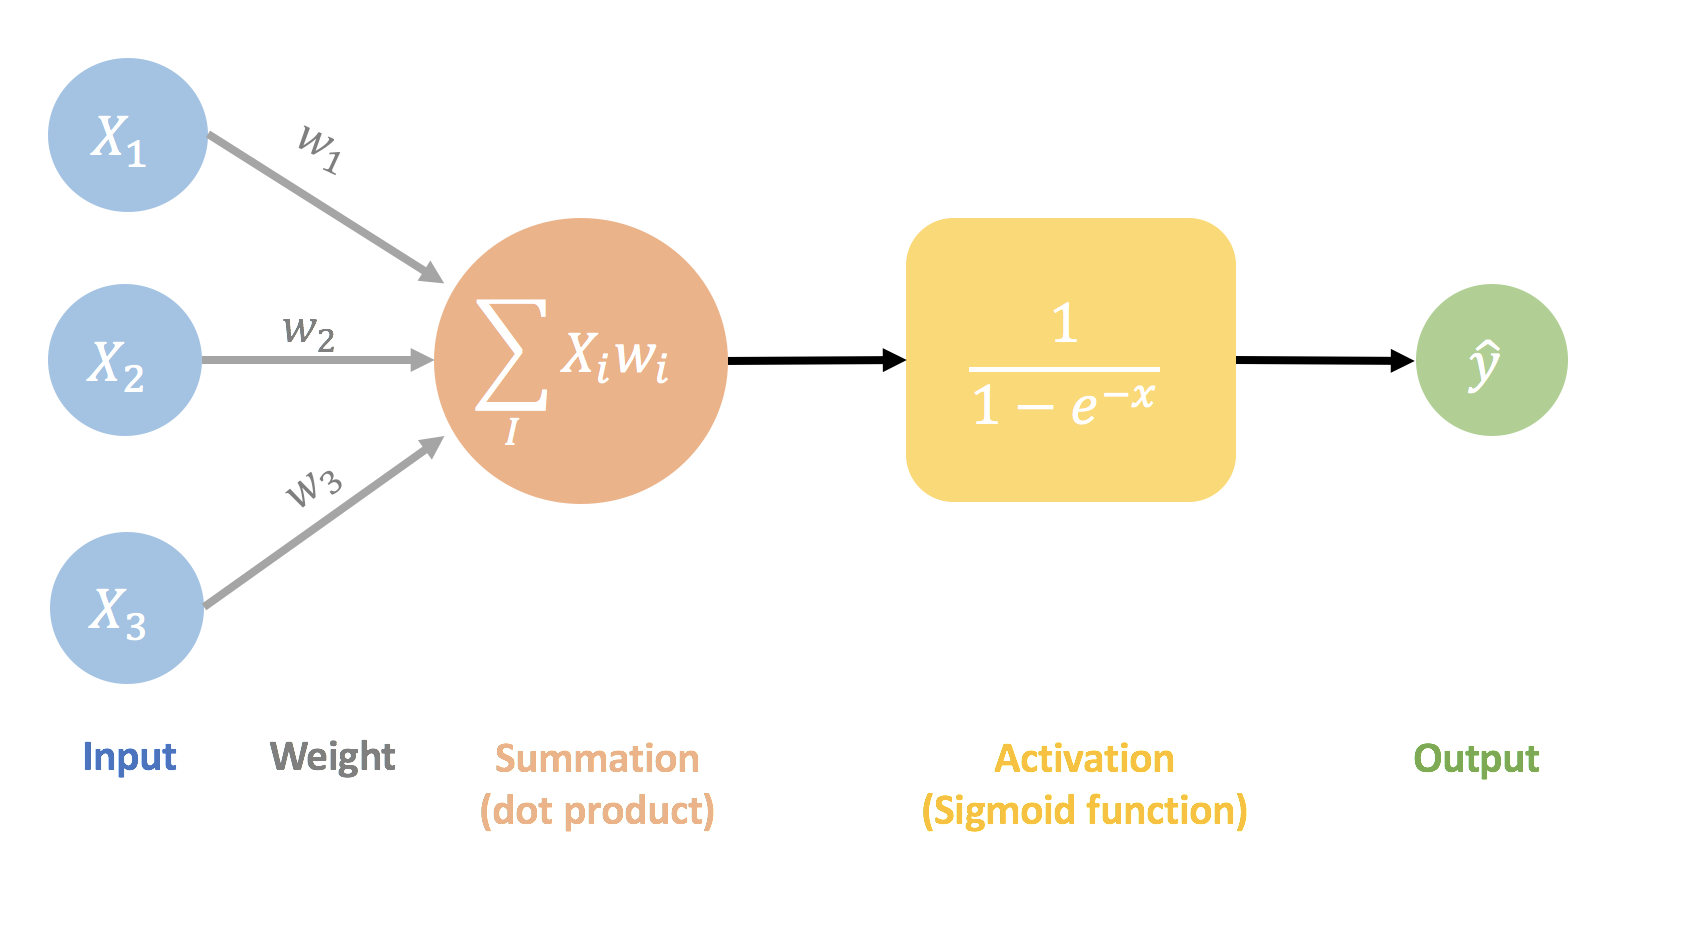

In [42]:
from IPython.display import display, Image
Image(filename='/Users/ywu58/Desktop/NN.png')

$$\hat{y} = h = \sigma (\sum_{i=1}^{k} X^{i}w^{i})$$

 Cost function: $$ J(w) = \frac{1}{2} \sum_{i=1}^{n} {(\hat{y} - y)}^2  $$

$$\frac{dJ(w)}{dw}=(\hat{y} - y) \sigma'(\sum_{i=1}^{k} X^{i}w^{i})X$$

$$w := w - \alpha \frac{dJ(w)}{dw} = w - \alpha (\hat{y} - y) \sigma'(\sum_{i=1}^{k} X^{i}w^{i})X$$

In [40]:
import numpy as np

# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
w = 2*np.random.random((3,1)) - 1

alpha = 0.1

for i in range(10000):

    # forward propagation
    
    y_hat = sigmoid(np.dot(X,w))

    # how much did we miss?
    error = y - y_hat

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    delta = error * sigmoid(y_hat,True)

    # update weights
    w += alpha*np.dot(X.T, delta)

print("Output After Training:")
print(y_hat)


Output After Training:
[[ 0.03180337]
 [ 0.02578546]
 [ 0.97904945]
 [ 0.97412997]]


# Second Example

In [2]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in xrange(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print "Error:" + str(np.mean(np.abs(l2_error)))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
print "Output After Training:"
print l2


Error:0.496410031903
Error:0.00858452565325
Error:0.00578945986251
Error:0.00462917677677
Error:0.00395876528027
Error:0.00351012256786
Output After Training:
[[ 0.00260572]
 [ 0.99672209]
 [ 0.99701711]
 [ 0.00386759]]


# Tuning the Alpha

In [3]:
import numpy as np

alphas = [0.001,0.01,0.1,1,10,100,1000]

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

for alpha in alphas:
    print "\nTraining With Alpha:" + str(alpha)
    np.random.seed(1)

    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((3,4)) - 1
    synapse_1 = 2*np.random.random((4,1)) - 1

    for j in xrange(60000):

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # how much did we miss the target value?
        layer_2_error = layer_2 - y

        if (j% 10000) == 0:
            print "Error after "+str(j)+" iterations:" + str(np.mean(np.abs(layer_2_error)))

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))




Training With Alpha:0.001
Error after 0 iterations:0.496410031903
Error after 10000 iterations:0.495164025493
Error after 20000 iterations:0.493596043188
Error after 30000 iterations:0.491606358559
Error after 40000 iterations:0.489100166544
Error after 50000 iterations:0.485977857846

Training With Alpha:0.01
Error after 0 iterations:0.496410031903
Error after 10000 iterations:0.457431074442
Error after 20000 iterations:0.359097202563
Error after 30000 iterations:0.239358137159
Error after 40000 iterations:0.143070659013
Error after 50000 iterations:0.0985964298089

Training With Alpha:0.1
Error after 0 iterations:0.496410031903
Error after 10000 iterations:0.0428880170001
Error after 20000 iterations:0.0240989942285
Error after 30000 iterations:0.0181106521468
Error after 40000 iterations:0.0149876162722
Error after 50000 iterations:0.0130144905381

Training With Alpha:1
Error after 0 iterations:0.496410031903
Error after 10000 iterations:0.00858452565325
Error after 20000 iteration

In [4]:
import numpy as np

alphas = [0.001,0.01,0.1,1,10,100,1000]

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])



for alpha in alphas:
    print "\nTraining With Alpha:" + str(alpha)
    np.random.seed(1)

    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((3,4)) - 1
    synapse_1 = 2*np.random.random((4,1)) - 1
        
    prev_synapse_0_weight_update = np.zeros_like(synapse_0)
    prev_synapse_1_weight_update = np.zeros_like(synapse_1)

    synapse_0_direction_count = np.zeros_like(synapse_0)
    synapse_1_direction_count = np.zeros_like(synapse_1)
        
    for j in xrange(60000):

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # how much did we miss the target value?
        layer_2_error = y - layer_2

        if (j% 10000) == 0:
            print "Error:" + str(np.mean(np.abs(layer_2_error)))

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)
        
        synapse_1_weight_update = (layer_1.T.dot(layer_2_delta))
        synapse_0_weight_update = (layer_0.T.dot(layer_1_delta))
        
        if(j > 0):
            synapse_0_direction_count += np.abs(((synapse_0_weight_update > 0)+0) - ((prev_synapse_0_weight_update > 0) + 0))
            synapse_1_direction_count += np.abs(((synapse_1_weight_update > 0)+0) - ((prev_synapse_1_weight_update > 0) + 0))        
        
        synapse_1 += alpha * synapse_1_weight_update
        synapse_0 += alpha * synapse_0_weight_update
        
        prev_synapse_0_weight_update = synapse_0_weight_update
        prev_synapse_1_weight_update = synapse_1_weight_update
    
    print "Synapse 0"
    print synapse_0
    
    print "Synapse 0 Update Direction Changes"
    print synapse_0_direction_count
    
    print "Synapse 1"
    print synapse_1

    print "Synapse 1 Update Direction Changes"
    print synapse_1_direction_count


Training With Alpha:0.001
Error:0.496410031903
Error:0.495164025493
Error:0.493596043188
Error:0.491606358559
Error:0.489100166544
Error:0.485977857846
Synapse 0
[[-0.28448441  0.32471214 -1.53496167 -0.47594822]
 [-0.7550616  -1.04593014 -1.45446052 -0.32606771]
 [-0.2594825  -0.13487028 -0.29722666  0.40028038]]
Synapse 0 Update Direction Changes
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  0.  1.  1.]]
Synapse 1
[[-0.61957526]
 [ 0.76414675]
 [-1.49797046]
 [ 0.40734574]]
Synapse 1 Update Direction Changes
[[ 1.]
 [ 1.]
 [ 0.]
 [ 1.]]

Training With Alpha:0.01
Error:0.496410031903
Error:0.457431074442
Error:0.359097202563
Error:0.239358137159
Error:0.143070659013
Error:0.0985964298089
Synapse 0
[[ 2.39225985  2.56885428 -5.38289334 -3.29231397]
 [-0.35379718 -4.6509363  -5.67005693 -1.74287864]
 [-0.15431323 -1.17147894  1.97979367  3.44633281]]
Synapse 0 Update Direction Changes
[[ 1.  1.  0.  0.]
 [ 2.  0.  0.  2.]
 [ 4.  2.  1.  1.]]
Synapse 1
[[-3.70045078]
 [ 4.57578637]
 [-7.

# Adding Nodes

In [5]:
import numpy as np

alphas = [0.001,0.01,0.1,1,10,100,1000]
hiddenSize = 32

# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_output_to_derivative(output):
    return output*(1-output)
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
			[1],
			[1],
			[0]])

for alpha in alphas:
    print "\nTraining With Alpha:" + str(alpha)
    np.random.seed(1)

    # randomly initialize our weights with mean 0
    synapse_0 = 2*np.random.random((3,hiddenSize)) - 1
    synapse_1 = 2*np.random.random((hiddenSize,1)) - 1

    for j in xrange(60000):

        # Feed forward through layers 0, 1, and 2
        layer_0 = X
        layer_1 = sigmoid(np.dot(layer_0,synapse_0))
        layer_2 = sigmoid(np.dot(layer_1,synapse_1))

        # how much did we miss the target value?
        layer_2_error = layer_2 - y

        if (j% 10000) == 0:
            print "Error after "+str(j)+" iterations:" + str(np.mean(np.abs(layer_2_error)))

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        layer_2_delta = layer_2_error*sigmoid_output_to_derivative(layer_2)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        layer_1_error = layer_2_delta.dot(synapse_1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(layer_1)

        synapse_1 -= alpha * (layer_1.T.dot(layer_2_delta))
        synapse_0 -= alpha * (layer_0.T.dot(layer_1_delta))



Training With Alpha:0.001
Error after 0 iterations:0.496439922501
Error after 10000 iterations:0.491049468129
Error after 20000 iterations:0.484976307027
Error after 30000 iterations:0.477830678793
Error after 40000 iterations:0.46903846539
Error after 50000 iterations:0.458029258565

Training With Alpha:0.01
Error after 0 iterations:0.496439922501
Error after 10000 iterations:0.356379061648
Error after 20000 iterations:0.146939845465
Error after 30000 iterations:0.0880156127416
Error after 40000 iterations:0.065147819275
Error after 50000 iterations:0.0529658087026

Training With Alpha:0.1
Error after 0 iterations:0.496439922501
Error after 10000 iterations:0.0305404908386
Error after 20000 iterations:0.0190638725334
Error after 30000 iterations:0.0147643907296
Error after 40000 iterations:0.0123892429905
Error after 50000 iterations:0.0108421669738

Training With Alpha:1
Error after 0 iterations:0.496439922501
Error after 10000 iterations:0.00736052234249
Error after 20000 iteration

# Drop-out

In [6]:
import numpy as np
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
alpha,hidden_dim,dropout_percent,do_dropout = (0.5,4,0.2,True)
synapse_0 = 2*np.random.random((3,hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim,1)) - 1
for j in xrange(60000):
    layer_1 = (1/(1+np.exp(-(np.dot(X,synapse_0)))))
    if(do_dropout):
        layer_1 *= np.random.binomial([np.ones((len(X),hidden_dim))],1-dropout_percent)[0] * (1.0/(1-dropout_percent))
    layer_2 = 1/(1+np.exp(-(np.dot(layer_1,synapse_1))))
    layer_2_delta = (layer_2 - y)*(layer_2*(1-layer_2))
    layer_1_delta = layer_2_delta.dot(synapse_1.T) * (layer_1 * (1-layer_1))
    synapse_1 -= (alpha * layer_1.T.dot(layer_2_delta))
    synapse_0 -= (alpha * X.T.dot(layer_1_delta))
print "Output After Training:"
print layer_2

Output After Training:
[[ 0.14780985]
 [ 0.97826134]
 [ 0.87622889]
 [ 0.15216415]]
